# Continous Distributions

## Introduction: A Baseball Spinner Game

The baseball board game All-Star Baseball has been honored as one of the fifty most influential board games of all time according to the Wikipedia Encyclopedia (https://en.wikipedia.org/wiki/All_Star_Baseball). This game is based on a collection of spinner cards, where one card represents the possible batting accomplishments for a single player. The game is played by placing a card on a spinner and a spin determines the batting result for that player.

A spinner card is constructed by use of the statistics collected for a player during a particular season. To illustrate this process, the table below shows the batting statistics for the famous player Mickey Mantle for the 1956 baseball season. When Mantle comes to bat, that is called a plate appearance (PA) – we see from the table that he had 632 plate appearances this season. There were several events possible when Mantle came to bat – he could get a single (1B), a double (2B), a triple (3B), or a home run (HR). Also he could walk (BB), strike out (SO), or get other type of out.

|PA |1B |2B |3B |HR |BB |SO |Other OUTS|
|---|---|---|---|---|---|---|----------|
|632|109|22 |5  |52 |99 |112|       233|


The probability of each type of event can be found by dividing each count by the number of plate appearances. Each probability is converted to an angle on the spinner by multiplying each probability by the total number of degrees (360). From these degree measurements, a spinner is constructed, displayed in Figure 5.1, where the area of each wedge of the circle is proportional to
the probability of that event occurring. A single plate appearance of Mickey Mantle can be simulated by spinning the spinner and observing the batting event.

In [1]:
import numpy as np
import pandas as pd

type_count = ['PA','1B','2B','3B','HR','BB','SO', 'Other OUTS']
n = np.array([632,109,22, 5,52,99,112,233])

In [2]:
np.round(n[1:]/n[1:].sum(),3)

array([0.172, 0.035, 0.008, 0.082, 0.157, 0.177, 0.369])

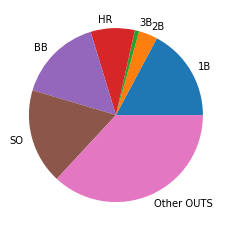

In [3]:
import matplotlib.pyplot as plt

plt.pie(np.round(n[1:]/n[1:].sum(),3),
       labels=type_count[1:]);

In [4]:
import numpy as np

def degrees_in_spinner(values):
    deg = np.zeros(len(values))
    deg = values*360/values.sum()
    return(deg)

In [5]:
np.round(degrees_in_spinner(np.round(n[1:]/n[1:].sum(),3)),0)

array([ 62.,  13.,   3.,  30.,  57.,  64., 133.])

In [6]:
import pandas as pd

pd.DataFrame({'PA':n[1:],
            'Probability':np.round(n[1:]/n[1:].sum(),3),
            'Degrees in spinner':np.round(degrees_in_spinner(np.round(n[1:]/n[1:].sum(),3)),0)},
            index=type_count[1:]).transpose()

,1B,2B,3B,HR,BB,SO,Other OUTS
PA,109.000,22.000,5.000,52.000,99.000,112.000,233.000
Probability,0.172,0.035,0.008,0.082,0.157,0.177,0.369
Degrees in spinner,62.000,13.000,3.000,30.000,57.000,64.000,133.000


The binomial described in Chapter 4 is an example of a discrete random variable which takes on only values in a list, such as {0,1,...,10}. How can one think about probabilities where the random variable is not discrete? As a simple example, consider the experiment of spinning the spinner in Figure 5.2 where the random variable X is the recorded location. Here X is a continuous
random variable that can take on any value between 0 and 100.

In [7]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


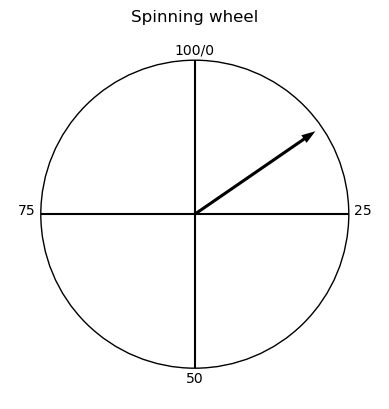

In [8]:
import matplotlib.pyplot as plt
plt.style.use('default')
#plt.style.use('classic')

angle = np.pi/5
dx = np.cos(angle) - 0.1
dy = np.sin(angle) - 0.1

figure, axes = plt.subplots()
draw_circle = plt.Circle((0.0, 0.0), 1,fill=False)

plt.gcf().gca().add_artist(draw_circle)
plt.title('Circle')
axes.set_aspect(1)
plt.hlines(y = 0, xmin=-1, xmax=1, color='black')
plt.vlines(x = 0.,ymin=-1, ymax=1, color='black')

plt.axis('off')
plt.arrow(x = 0, y = 0,
         dx = dx, dy = dy, 
          width=.02, facecolor='black', edgecolor='none')
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])

plt.annotate('25', (1,0),
             textcoords="offset points",
             xytext=(10,0),
            ha='center')
plt.annotate('100/0', xy = (0,1),
            textcoords="offset points",
             xytext=(0,5),
            ha='center')

plt.annotate('75', xy = (-1,0),
            textcoords="offset points",
             xytext=(-10,0),
            ha='center')

plt.annotate('50', xy = (0,-1),
            textcoords="offset points",
             xytext=(0,-10),
            ha='center')


plt.axes
plt.title('Spinning wheel')
plt.show()

In this chapter, probabilities for a continuous random variable will be shown to be represented by means of a smooth curve where the probability that $X$ falls in a given interval is equal to an area under the curve. Through a series of examples, we will illustrate probability calculations for this type of random variables.

## The Uniform Distribution

Consider the spinner experiment described in previous section where the location of the spinner $X$ can be any number between 0 and 100. Our computer simulated spinning this spinner 20 times with the following results (rounded to the nearest tenth):

|||||||||||
|--|--|--|--|--|--|--|--|--|--|
|95.0 |23.1| 60.7| 48.6| 89.1| 76.2| 45.6| 1.9  |93.5 |91.7|
|82.1 |44.5| 61.5| 79.2| 92.2| 73.8| 17.6| 40.6 |41.0| 89.4|

A histogram of these values of X is shown in the next figure:

[Text(0.5, 0, 'Spin')]

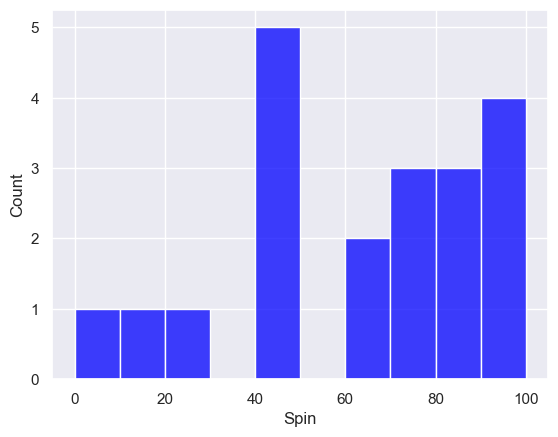

In [9]:
import numpy as np
import seaborn as sns

sns.set_theme();

loc = np.array([95.0, 23.1, 60.7, 48.6, 89.1, 76.2, 45.6, 1.9, 93.5, 91.7, 
          82.1, 44.5, 61.5, 79.2, 92.2, 73.8, 17.6, 40.6, 41.0, 89.4])

ax = sns.histplot(loc,
             bins=10,
             binrange=[0,100],
            color='blue');

ax.set(xlabel='Spin')

Although one thinks that any spin between 0 and 100 is equally likely to occur, there does not appear to be any obvious shape of this histogram. But the spinner was only spun 20 times. Let’s try spinning 1000 times– a histogram of the spins is shown in the next figure:

In [10]:
import random
from scipy.stats import uniform as sunif
random.seed(100)

# random.sample(np.arange(101),20)
x = np.array([random.random()*100 for _ in np.arange(1000)])

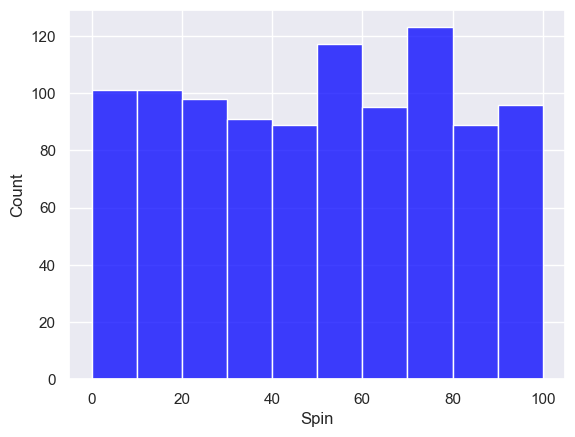

In [11]:
sns.set_theme();


ax = sns.histplot(x,
             bins=10,
             binrange=[0,100],
            color='blue');

ax.set(xlabel='Spin');

Note that since there is a large sample of values, a small interval width was chosen for each bin in the histogram. Now a clearer shape in the histogram can be seen – although there is variation in the bar heights, the general shape of the histogram seems to be pretty flat or uniform over the entire interval of possible values of $X$ between 0 and 100.

Suppose one was able to spin the spinner a large number of times. If one does this, then the shape of the histogram looks close to the uniform density shown in the next figure

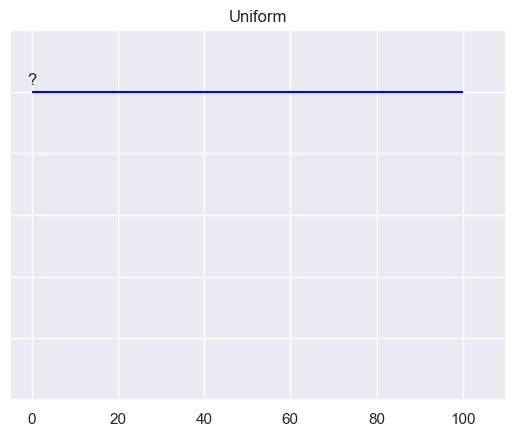

In [12]:
plt.title('Uniform')

plt.annotate('?', xy = (0,50),
            textcoords="offset points",
             xytext=(0,5),
            ha='center')


plt.xlim([-5, 110])
plt.ylim([25, 55])

cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_ticklabels([])

plt.hlines(y = 50, xmin=0, xmax=100, color='blue');

When the random variable $X$ is continuous, such as the case of the spinner result here, then one represents probabilities by means of a smooth curve that is called a **density curve**; more formally, a **probability density curve**. How does one find probabilities? When $X$ is continuous, then probabilities are represented by areas under the density curve.

As a simple example, what is the chance that the spinner result falls between 0 and 100? Since the scale of the spinner is from 0 to 100, one knows that all spins must fall in this interval, so the probability of $X$ landing in (0, 100) is 1. This probability is represented by the total area under the flat line between 0 and 100. Since the area of this rectangle is given by height times base, and the base is equal to 100, the height of this density curve must be $1/100 = 0.01$. This is the value that should replace the "?" in the previous figure. In this case one says that the spinner result has a uniform distribution and the curve is a uniform density.

By means of similar area computations, one finds other probabilities about the spinner location $X$.

1. What is the probability the spin falls between 20 and 60? That is, what is

$$P(20 < X < 60)?$$

This probability is equal to the shaded area under the uniform density between 20 and 60. See Figure 5.6. Using again the formula for the area of a rectangle, the base is $60 − 20 = 40$ and the height is 0.01, so

$$P(20 < X < 60) = 40(0.01) = 0.4.$$

2. What is the probability the spin is greater than 80? That is, what is $P(X > 80)$? Figure 5.7 shows the area that needs to be computed to find this probability. Note that the area under the curve only between the values 80 and 100 is shaded, since $X$ cannot be larger than 100. Again by finding the area of the shaded rectangle, we see that $P(X > 80) = 20 (0.01) = 0.2$.

##### Simulating from a Uniform Density

The Python `uniform.rvs()` from `scipy.stats` package is helpful for simulating from a uniform density. The arguments are the number of simulations and the minimum and maximum value of the support of the density. Below 50 values of a random spinner are simulated that fall uniformly on the interval from 0 to 50.

In [13]:
from scipy.stats import uniform
random.seed(100)

x = uniform.rvs(0, 50, size=50)

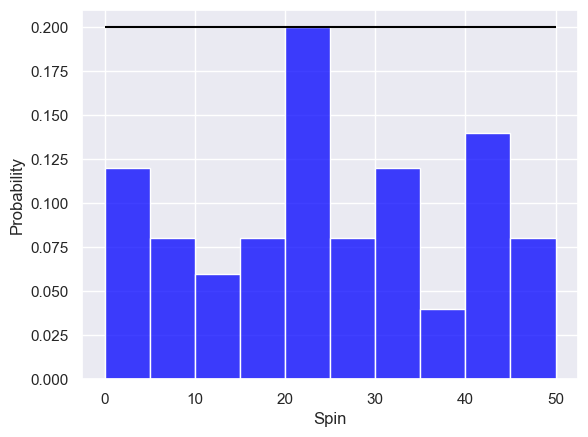

In [14]:
import seaborn as sns

ax = sns.histplot(x,
                  stat = 'probability',
                  bins = 10,
                  binrange=[0,50],
                  color='blue');

plt.hlines(y = 0.2, xmin=0, xmax=50, color='black');

ax.set(xlabel='Spin');

## Probability Density: Waiting for a Bus

Consider a random experiment where a continuous random variable $X$ is observed such as the location of the spinner in the previous session. Define the support of $X$ to be the set of possible values for $X$. For example, the support of $X$ for the spinner example is the interval (0, 100). To describe probabilities about $X$, a density function denoted by $f(x)$ is defined. Any function $f$ will not work – one requires that f satisfy two properties:

- **Property 1**: The probability density $f$ must be nonnegative which means that

$$f(x) \geq 0 \text{, for all }x$$

- **Property 2**: The total area under the probability density curve $f$ must be equal to 1. Mathematically,

$$\int_{-\infty}^{\infty} f(x)dx =1$$

To illustrate a probability density, suppose that a professor has a class that meets three times a week. To get to class, the professor walks and waits for a bus to go to school. From past experience, the professor knows that she can wait any time between 0 and 10 minutes for the bus, and she knows that each waiting time between 0 and 10 minutes is equally likely.

For a given week, what’s the chance that her longest wait will be under 7 minutes? Let $W$ denote her longest waiting time for the week. One can show that the density for $W$ is given by

$$f(w) = \frac{3w^{2}}{1000}, 0<w<10$$

This density for this longest waiting time has the following plot

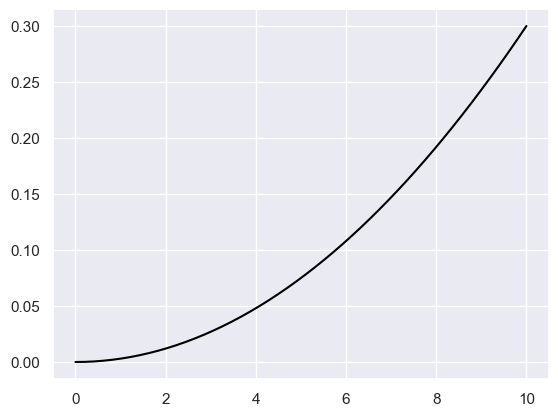

In [15]:
x = np.linspace(0,10,50)
f_x = (3*x**2)/1000.

plt.plot(x, f_x, c= 'black');


Before we go any further, we should check if this is indeed a legitimate probability density:

1. Note from the graph that the density does not take on negative values, so the first property is satisfied.

2. Second, for it to be a probability density, the entire area under the curve must be equal to 1. One can check this by finding the integral of the density between 0 and 10 (the region where the density is positive):

$$\int_{0}^{10} \frac{3w^{2}}{1000} dw = \left. \frac{w^{3}}{1000} \right|_{0}^{10} = \frac{10^{3}}{1000} - \frac{0}{1000} = 1$$

The entire area under the curve is indeed equal to 1, so f is a legitimate probability density. Now that f is known to be a probability density, one can use it to find probabilities. To find the probability that this longest waiting time is less than 7 minutes, $P(W < 7)$, one wishes to compute the area under the density curve between 0 and 7, as shown in the next plot:

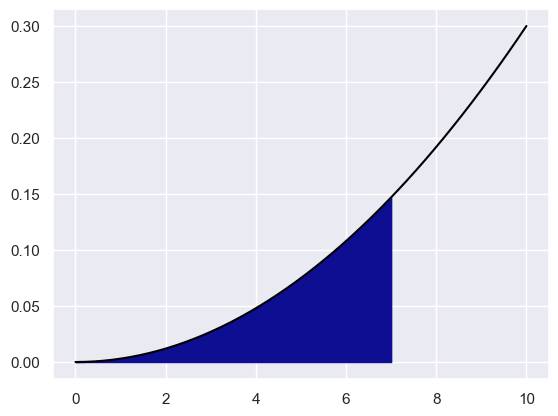

In [16]:
x = np.linspace(0,10,50)
f_x = (3*x**2)/1000.

x1 = np.linspace(0,7,50)
f_x1 = (3*x1**2)/1000.

plt.plot(x, f_x, c= 'black');
plt.fill_between(x1, f_x1, color='#0e0e92');


This is equivalent to the integral

$$\int_{0}^{7} \frac{3w^{2}}{1000} dw $$

and, by evaluating this, one obtains the probability

$$\int_{0}^{7} \frac{3w^{2}}{1000} dw = \left. \frac{w^{3}}{1000} \right|_{0}^{7} = \frac{7^{3}}{1000} - \frac{0}{1000} = 0.343$$

Suppose one is interested in the probability that the longest waiting time
is between 6 and 8 minutes. This is represented by the shaded area in

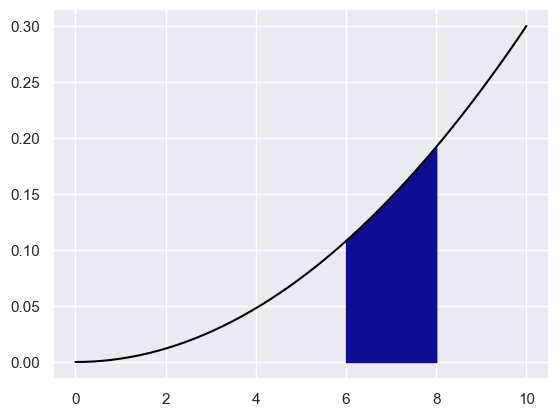

In [17]:
x = np.linspace(0,10,50)
f_x = (3*x**2)/1000.

x1 = np.linspace(6,8,50)
f_x1 = (3*x1**2)/1000.

plt.plot(x, f_x, c= 'black');
plt.fill_between(x1, f_x1, color='#0e0e92');

To compute this area, one finds the integral of the density between 6 and 8

$$\int_{6}^{8} \frac{3w^{2}}{1000} dw = \left. \frac{w^{3}}{1000} \right|_{6}^{8} = \frac{8^{3}}{1000} - \frac{6}{1000} = 0.296$$

##### Simulating waiting time

Recall that the waiting time variable $W$ was defined as the longest waiting time for the week where each of the separate waiting times has a uniform distribution from 0 to 10 minutes. By simulating the process, one simulates values of $W$. By use of three applications of `uniform.rvs` one simulates 1000 waiting times for Monday, Wednesday, and Friday. The pmax() function is used to simulate the longest waiting time for each group of waiting times.

In [18]:
from scipy.stats import uniform
random.seed(100)

sz = 1000

wait_monday = uniform.rvs(0,10,size = sz)
wait_wednesday = uniform.rvs(0,10,size = sz)
wait_friday = uniform.rvs(0,10,size = sz)

In [19]:
longest_wait = np.maximum.reduce([wait_monday, wait_wednesday, wait_friday])

In [20]:
longest_wait[:5]

array([8.86724774, 7.48957508, 9.62030622, 5.92139525, 3.52296362])

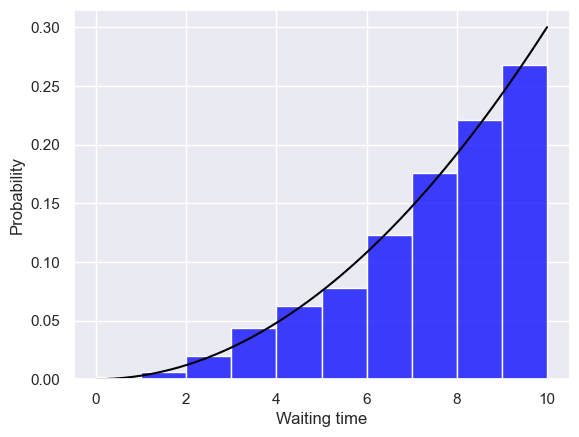

In [21]:
import seaborn as sns

ax = sns.histplot(longest_wait,
                  stat = 'probability',
                  bins = 10,
                  binrange=[0,10],
                  color='blue');

# plt.hlines(y = 0.2, xmin=0, xmax=50, color='black');

x = np.linspace(0,10,50)
f_x = (3*x**2)/1000.
plt.plot(x, f_x, c= 'black');


ax.set(xlabel='Waiting time');

## The Cumulative Distribution Function

To find any probability about the maximum waiting time, one computes an area under the curve that is equivalent to integrating the density curve over a region. But there is a basic function that can be computed at the beginning that will simplify these probability computations.

Choose an arbitrary point $x$ – the **cumulative distribution function at $x$**, or **cdf** for short, is the probability that $W$ is less than or equal to $x$:

$$ F(x) = P(W \leq x) = \int_{-\infty}^{x} f(w)dw$$

Here suppose one chooses a value of x in the interval (0, 10). Then F(x) would be the area under the density curve between 0 and x shown in Figure 5.13.

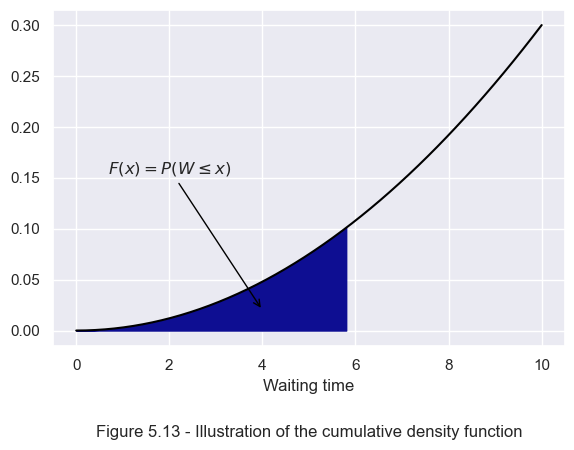

In [22]:
fig = plt.figure();
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
txt = 'Figure 5.13 - Illustration of the cumulative density function';
annotation_string = r"$F(x) = P(W \leq x)$" 

ax.annotate(annotation_string, xy=(4, 0.02),  xycoords='data',
            xytext=(2, 0.15), textcoords='data',
            #arrowprops=dict(facecolor='black', width = 2.2, headwidth = 5.5),
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = 'black'),
            horizontalalignment='center', verticalalignment='bottom',
            )

x = np.linspace(0,10,50)
f_x = (3*x**2)/1000.

x1 = np.linspace(0,5.8,50)
f_x1 = (3*x1**2)/1000.

plt.plot(x, f_x, c= 'black');
plt.fill_between(x1, f_x1, color='#0e0e92');
ax.set(xlabel='Waiting time');

plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12);

Writing this area as an integral, one computes $F(x)$ as

$$F(x) = P(W \leq x) = \int_{0}^{x} \frac{3w^{2}}{1000} dw = \left. \frac{w^{3}}{1000} \right|_{0}^{x} = \frac{x^{3}}{1000}$$

This formula is valid for any value of x in the interval (0, 10). In fact, $F(x)$ is defined for all values of $x$ on the real line.

- If $x$ is a value smaller than or equal to 0, then we see from the figure that the probability that $W$ is smaller than $x$ is equal to 0. So $F(x) = 0$ for $x \leq 0$.

- On the other hand, if $x$ is greater than or equal to 10, then the probability that $W$ is smaller than $x$ is 1. So $F(x) = 1$ for $x \geq 10$.

Putting all together, one sees that the cdf F is given by:

$$
\begin{equation}
  F(x) =
    \begin{cases}
      0, & \text{$x \leq 0$}\\
      x^{3}/1000, & \text{$0 \leq x \leq 10$}\\
      1, & \text{$x \geq 10$}
    \end{cases}       
\end{equation}
$$

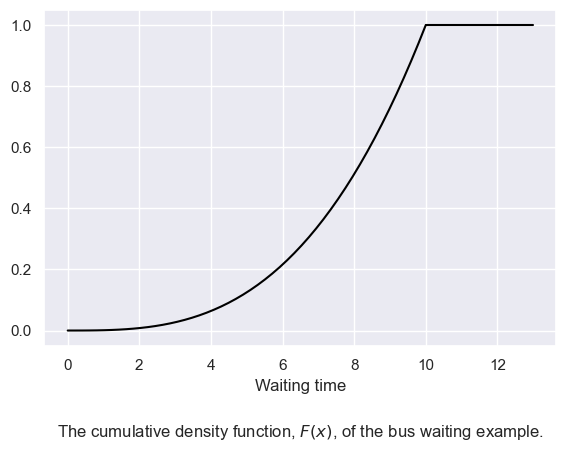

In [23]:
txt = r'The cumulative density function, $F(x)$, of the bus waiting example.'
fig = plt.figure();
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))

x = np.linspace(0,10,50)
x1 = np.linspace(10,13,50)

f_x = (x**3)/1000.
f_x1 = np.array([1 for _ in np.arange(50)])

plt.plot(x, f_x, c= 'black');
plt.plot(x1, f_x1, c= 'black');

ax.set(xlabel='Waiting time');
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12);

## Finding probabilities using the CDF

Once we have computed the cdf function $F$, probabilities are found simply by evaluating $F$ at different points. Fortunately, no additional integration is needed.

For example, to find the probability that the maximum waiting time $W$ is less than equal to 6 minutes, one just compute $F(6) = P(W \leq 6) = 6^{3} /1000 = 0.216$.

To compute the probability that the maximum waiting time exceeds 8 minutes, first note that "exceeding 8 minutes" is the complement event to "less than or equal to 8 minutes", and so

$$ P(W > 8) = 1-P(W \leq 8) = 1 - F(8) = 1 - \frac{8^{3}}{1000} = 0.488$$

Likewise, if one is interested in the chance that the waiting time $W$ falls between 2 and 4, represent the probability as the difference of two "less-than" probabilities, and then subtract the two values of $F$.

$$ P(2 < W < 4) = P(W \leq 4) -P(W \leq 2) = F(4) - F(2) = \frac{4^{3}}{1000} - \frac{2^{3}}{1000} = 0.056$$

##### Computing Probabilities by Simulation

For the waiting for a bus example, the variable longest wait contains 1000 simulated values of our longest waiting time. This sample is used to compute approximate probabilities. To illustrate, to find the probability that the longest wait exceeds 8 minutes, one finds the proportion of simulated values of $W$ that exceeds 8.

In [24]:
len(longest_wait[longest_wait > 8])/1000

0.489

In a similar fashion one approximates the probability that a longest waiting time falls between 2 and 4 minutes.

In [25]:
len(longest_wait[(longest_wait > 2) &
                (longest_wait < 4)])/1000

0.064

Or between 6 and 10 minutes

In [26]:
len(longest_wait[(longest_wait > 6) &
                (longest_wait < 10)])/1000

0.788

## Summarizing a Continuous Random Variable

### Mean and standard deviation

One is interested in summarizing a continuous random variable. Natural summaries are given by the mean $\mu$ and the standard deviation $\sigma$, where these quantities are defined in a similar manner as for a discrete random variable, with the exception that summations are replaced by integrals.

The mean $\mu$, or equivalently the **expected value of $X$**, is given by

$$\mu = E(X) = \int_{-\infty}^{\infty} xf(x)dx$$

Just as in the discrete random variable case, there is an attractive interpretation of $\mu$. If one is able to observe a large number of values of $X$, then $\mu$ will be approximately equal to the sample mean $\bar{X}$ of these random values of $X$.

To define the spread of the values of $X$, one first computes the average squared deviation about the mean, the variance,

$$\sigma^{2} = Var(x) = E(X - \mu)^2 = \int_{-\infty}^{\infty}(x-\mu)^{2}f(x)dx$$

The standard deviation of $X$, $\sigma$, is defined to be the square root of the variance.

Let’s illustrate the computation of the mean and standard deviation for the bus waiting time problem. Using the definition of $f$, one gets that the mean is equal to

$$ \mu = \int_{0}^{10}x\left(\frac{3x^{2}}{1000}\right)dx $$

Performing the integration, one gets

$$ \mu = \int_{0}^{10}x \left(\frac{3x^{2}}{1000} \right)dx =  \left. \frac{3^{4}}{4000} \right|_{0}^{10} = \frac{3(10)^{4}}{1000} = 7.5$$

On, the average, one expects the longest wait in a week to be 7.5 minutes.

The computation of the variance is a bit more tedious, but straightforward.

$$\sigma^{2} = \int_{-\infty}^{\infty}(x-\mu)^{2} \left(\frac{3x^{2}}{1000} \right)dx = 3.75$$

So the standard deviation of $X$ is $\sigma = \sqrt{3.75}=1.94$

##### Computing the Mean and Standard Deviation by Simulation

Earlier, we demonstrated simulating 1000 values of the longest waiting time $W$. To check the computations of the mean $\mu$ and standard deviation $\sigma$, one computes the sample mean and standard deviation of the simulated values.

In [27]:
np.round(longest_wait.mean(), 6)

7.49991

In [28]:
np.round(longest_wait.std(), 6)

1.950086

One sees that these empirical values are close approximations to the exact values $\mu$ = 7.5 and $\sigma$ = 1.94.

### Percentiles

Another useful summary of a continuous random variable is a **percentile**. The 70<sup>th </sup> percentile, for example, is the value of $X$, call it $x$, such that 70% of the probability is to the left, shown in Figure 5.16. That is, the 70<sup>th </sup> percentile, call it $x_{70}$ , satisfies the equation:

$$P(X \leq x_{70}) = 0.70$$

Since one recognizes the left hand side of the equation as equivalent to the cdf $F$ (which already has been computed as $x^{3} /1000$), the equation is written as

$$F(x_{70}) = 0.70$$

that is,

$$\frac{x_{70}^{3}}{1000} = 0.70$$

To find the 70<sup>th </sup> percentile, the above equation is solved for $x_{70}$ – after some algebra, we get

$$x_{70} = \sqrt[3]{700} = 8.88$$

This means that approximately $70%$ of the longest waiting times will be shorter than 8.88 minutes over a duration of many weeks.

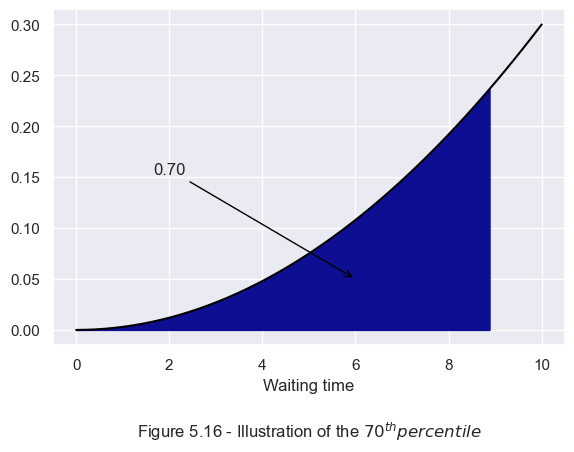

In [29]:
fig = plt.figure();
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
txt = r'Figure 5.16 - Illustration of the $70^{th} percentile$';
annotation_string = r"0.70" 

ax.annotate(annotation_string, xy=(6, 0.05),  xycoords='data',
            xytext=(2, 0.15), textcoords='data',
            #arrowprops=dict(facecolor='black', width = 2.2, headwidth = 5.5),
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = 'black'),
            horizontalalignment='center', verticalalignment='bottom',
            )

x = np.linspace(0,10,50)
f_x = (3*x**2)/1000.

x1 = np.linspace(0,8.88,50)
f_x1 = (3*x1**2)/1000.

plt.plot(x, f_x, c= 'black');
plt.fill_between(x1, f_x1, color='#0e0e92');
ax.set(xlabel='Waiting time');

plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12);

##### Computing Percentiles by Simulation

For the waiting for a bus example, the variable longest wait contains 1000 simulated values of our longest waiting time. This sample is used to compute approximate percentiles by computing sample percentiles of the simulated values. For example, by use of the `np.quantile()` (or `np.percentile`) function, one finds that the 10<sup>th </sup> and 90<sup>th </sup> percentiles of W are approximately 4.8 and 9.6 minutes.

In [30]:
np.round(np.quantile(longest_wait,0.1),4)

4.5159

In [31]:
np.round(np.percentile(longest_wait,10),4)

4.5159

In [32]:
np.round(np.quantile(longest_wait,0.9),4)

9.6609

In [33]:
np.round(np.percentile(longest_wait,90),4)

9.6609

## Normal Distribution

### Normal probability curve

One of the most popular races in the United States is marathon, a grueling 26-mile run. Most people are familiar with the Boston Marathon that is held in Boston, Massachusetts every April. But other cities in the U.S. hold yearly marathons. Here we look at data collected from Grandma’s Marathon that is held in Duluth, Minnesota every June.


In the year 2003, there were 2515 women who completed Grandma’s Marathon. The completion times in minutes for all of these women 
can be downloaded from the marathon’s website. A histogram of these times, measured in minutes, is shown in Figure 5.17

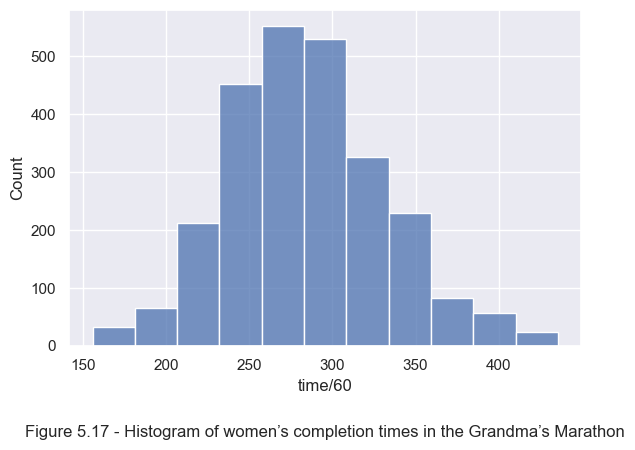

In [34]:
import seaborn as sns

fig = plt.figure();
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
txt = r'Figure 5.17 - Histogram of women’s completion times in the Grandma’s Marathon';

df_times_data = pd.read_pickle('./data/df_times_data.pkl')

sns.histplot(data=df_times_data[df_times_data['sex'] == 'F'],
            x = 'minutes', 
             bins = 11);

ax.set(xlabel='time/60');
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12);

Note that these measured times have a bell shape. Figure 5.18 superimposes a normal curve on top of this histogram. Note that this curve is a pretty good match to the histogram. In fact, data like this marathon time data that are measurements are often well approximated by a normal curve.

A normal density curve has the general form

$$f(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp \left\{-\frac{(x-\mu)^{2}}{2\sigma^{2}} \right\}, -\infty < x < \infty $$

In [35]:
 df_times_data[df_times_data['sex'] == 'F']['minutes'].mean()

284.48358034321365

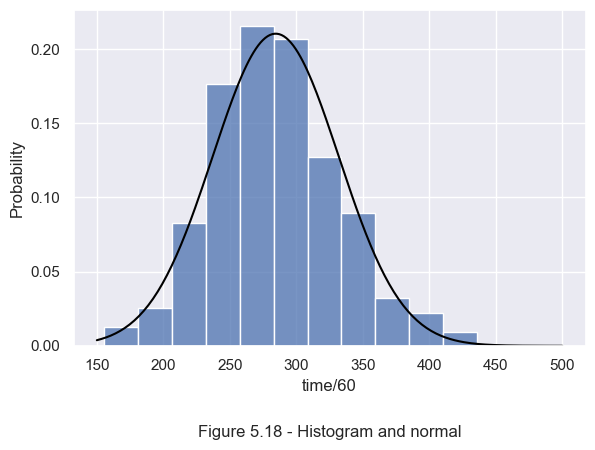

In [36]:
import numpy as np

sex = 'F'
mu = df_times_data[df_times_data['sex'] == sex].mean()
sigma = df_times_data[df_times_data['sex'] == sex].std()

x_n = np.linspace(150,500,200)
k = 1/(np.sqrt(2*np.pi)*sigma[0])
norm_x = k*np.exp((-(x_n-mu[0])**2)/(2*(sigma[0]**2)))

fig = plt.figure();
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
txt = r'Figure 5.18 - Histogram and normal';

df_times_data = pd.read_pickle('./data/df_times_data.pkl')

sns.histplot(data=df_times_data[df_times_data['sex'] == sex],
            x = 'minutes', 
              stat = 'probability',
             bins = 11);

sns.lineplot(x_n, 25*norm_x, color = 'black')

ax.set(xlabel='time/60');
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12);

In [37]:
np.round(df_times_data[df_times_data['sex'] == 'M']['minutes'].mean(),0)

264.0

In [38]:
np.round(df_times_data[df_times_data['sex'] == 'F']['minutes'].mean(),0)

284.0

In [39]:
np.round(df_times_data[df_times_data['sex'] == 'F']['minutes'].std(),0)

47.0

This density curve is described by two parameters – the mean  and the standard deviation σ. The mean µ is the center of the curve. Looking at the normal curve above, one sees that the curve is centered about 270 minutes – actually the mean of the normal curve is $\mu$ = 284. The number $\sigma$, the standard deviation, describes the spread of the curve. Here the normal curve standard deviation is $\sigma$ = 47. If one knows the mean and standard deviation of the normal curve, one can make reasonable predictions where the majority of times of the women runners will fall.

### Early use of the Normal curve

The famous normal curve was independently discovered by several scientists. Abraham De Moivre in the 18<sup>th</sup> century showed that a binomial probability for a large number of trials $n$ could be approximated by a normal curve. Pierre Simon Laplace and Carl Friedrich Gauss also made important discoveries about this curve. By the 19<sup>th</sup> century, it was believed by some scientists such as Adolphe Quetelet that the normal curve would represent the distribution of any group of homogeneous measurements. To illustrate his thinking, Quetelet considered the frequency measurements for the chest circumference measurements (in inches) for 5738 Scottish soldiers taken from the Edinburgh Medical and Surgical Journal (1817). A histogram of the chest measurements is shown in Figure 5.19. Quetelet’s beliefs were a bit incorrect – any group of measurements will not necessarily be normal-shaped. However, it is generally true that a distribution of physical measurements from a homogeneous group, say heights of American women or foot lengths of Chinese men will generally have this bell shape.

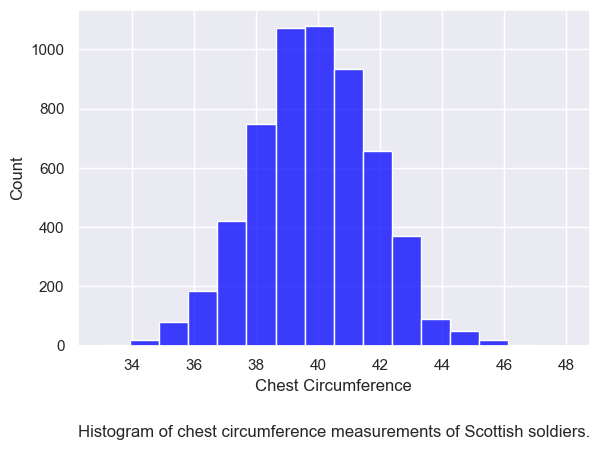

In [40]:
df_chest = pd.read_csv('./data/chest.csv')

fig = plt.figure();
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
txt = r'Histogram of chest circumference measurements of Scottish soldiers.';

sns.histplot(np.repeat(df_chest.Chest, df_chest.Count).values,
             bins = df_chest.shape[0],
            color='blue');

ax.set(xlabel='Chest Circumference');
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12);

In the previous sections of this chapter, the notion of a continuous random variable was introduced. Here the normal curve is introduced that is a popular model for representing the distribution of a measurement random variable. Also it will be seen that the normal curve is helpful for computing binomial probabilities and for representing the distributions of means taken from a
random sample.

#### Computing normal probabilities

Suppose that the normal density with $\mu$ = 284 minutes and $\sigma$= 47 minutes represents the distribution of women racing times. Say one is interested in the probability that a runner completes the race less than 4 hours or 240 minutes. One computes this probability by finding an area under the normal curve. Specifically, as indicated in Figure 5.20, this probability is the area under the curve for all times less than 240 minutes

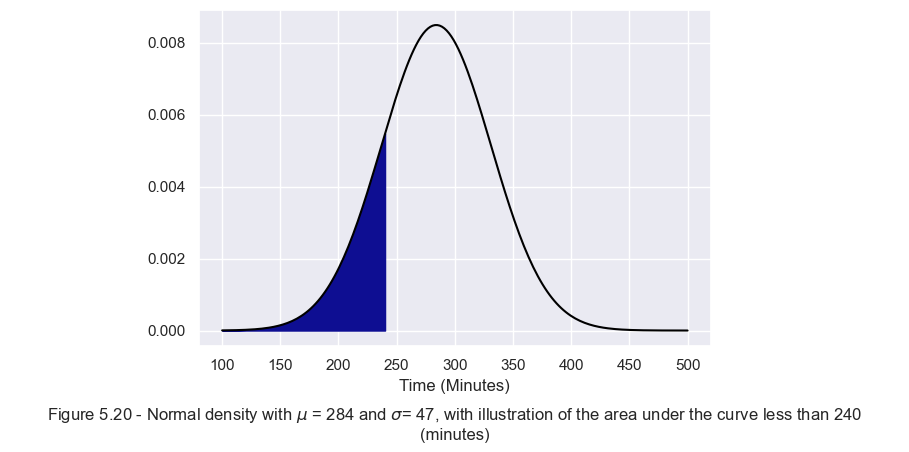

In [41]:
mu = 284
sigma = 47

fig = plt.figure();
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
txt = r'Figure 5.20 - Normal density with $\mu$ = 284 and $\sigma$= 47, with illustration of the area under the curve less than 240 (minutes)';


x_n = np.linspace(100,500,200)
k = 1/(np.sqrt(2*np.pi)*sigma)
norm_x = k*np.exp((-(x_n-mu)**2)/(2*(sigma**2)))

ax = sns.lineplot(x_n, norm_x, color = 'black');

x_fill = np.linspace(100,240,200)
norm_x_fill = k*np.exp((-(x_fill-mu)**2)/(2*(sigma**2)))

ax.fill_between(x_fill,norm_x_fill, color = '#0e0e92')

ax.set(xlabel='Time (Minutes)');
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12);

##### Normal Probability Calculations

One expresses this area as the integral

$$P(X \leq 240) = \int_{-\infty}^{240} \frac{1}{\sqrt{2\pi}\sigma} \exp \left\{-\frac{(x-\mu)^{2}}{2\sigma^{2}} \right\}dx$$

but unfortunately one cannot integrate this function analytically (as was done for a uniform density) to find the probability. Instead one finds this area by use of the Python object `scipy.stats.norm`. This object is used for three examples, illustrating the computation of three types of areas.

Returning to our example, recall that the  marathon times were approximately normally distributed with mean $\mu$ = 284 and standard deviation $\sigma$ = 47.

- ***Finding a "less than" area***.  Suppose one is interested in the probability that a woman marathon runner completes the race in under 240 minutes. That is, one wishes to find $P(X < 240)$ which is the area under the normal curve to the left of 240. The function value cdf(x, loc, scale) gives the value of the cdf of a normal random variable with mean $\mu = a$ and $\sigma = s$ evaluated at the value x. For our example, the mean and standard deviation are given by 284 and 47, respectively, so the desired probability is given by

In [42]:
from scipy.stats import norm
arrival_times = norm(loc = 284, scale = 47)

arrival_times.cdf(240)

0.1745927785587299

- ***Finding a "between two values" area***. Suppose one is interested in computing the probability that a marathon runner completes a race between two values, such as $P(230 < X < 280)$, shown in Figure 5.21.

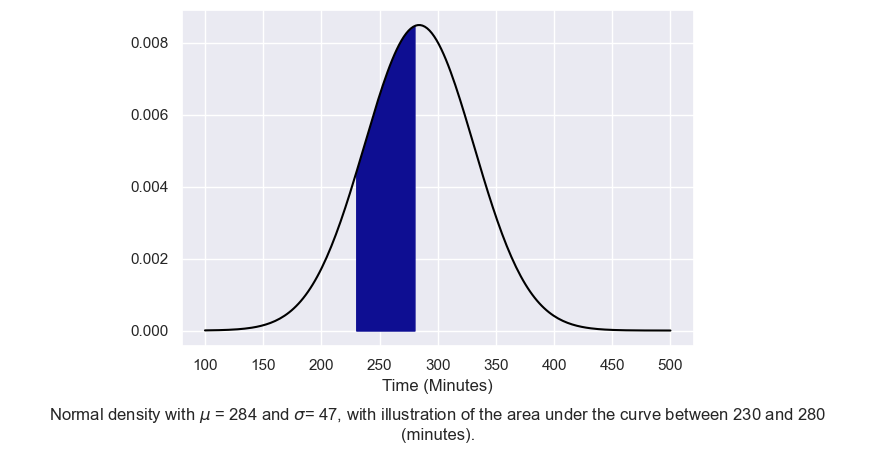

In [43]:
mu = 284
sigma = 47

fig = plt.figure();
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
txt = r'Normal density with $\mu$ = 284 and $\sigma$= 47, with illustration of the area under the curve between 230 and 280 (minutes).';

x_n = np.linspace(100,500,200)
section = np.linspace(230, 280,40)

ax = sns.lineplot(x=x_n,
            y = arrival_times.pdf(x_n),
                 color = 'black')

ax.fill_between(section,arrival_times.pdf(section), color = '#0e0e92')

ax.set(xlabel='Time (Minutes)');
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12);

One writes this probability as the difference of two "less than" probabilities:

$$P(230 < X < 280) = P(X<280) - P(X<230) = F(280) - F(230)$$

Where $F(X)$ is the cdf of a Normal(284, 47) variable evaluated at $x$. Therefore, by use of the `cdf()` function, this probability is equal to

In [44]:
arrival_times.cdf(280) - arrival_times.cdf(230)

0.3407972571190447

- ***Finding a "greater than" area***. Last, sometimes one will be interested in the probability that $X$ is greater than some value, such as $P(X > 300)$, the probability a runner takes more than 300 minutes to complete the race, shown in Figure 5.22

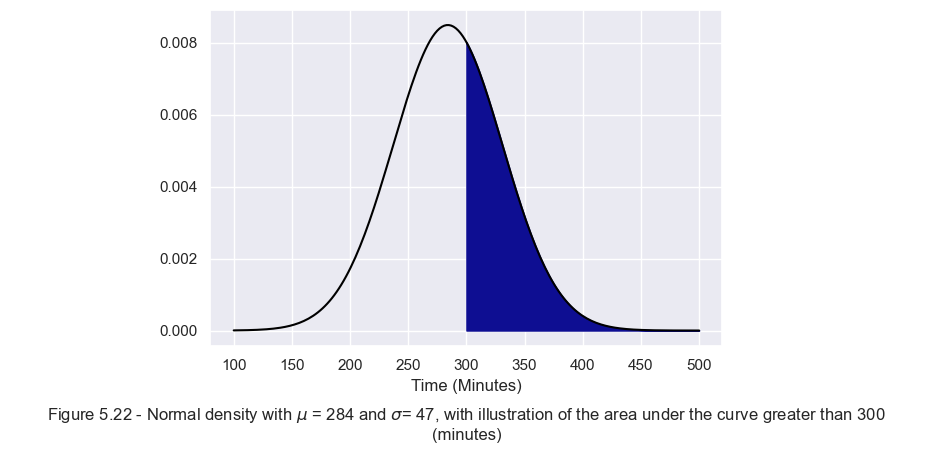

In [45]:
mu = 284
sigma = 47

fig = plt.figure();
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
txt = r'Figure 5.22 - Normal density with $\mu$ = 284 and $\sigma$= 47, with illustration of the area under the curve greater than 300 (minutes)';

x_n = np.linspace(100,500,200)
section = np.linspace(300, 500, 200)

ax = sns.lineplot(x=x_n,
            y = arrival_times.pdf(x_n),
                 color = 'black')

ax.fill_between(section,arrival_times.pdf(section), color = '#0e0e92')

ax.set(xlabel='Time (Minutes)');
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12);

This probability is found by the complement property of probability, that

$$P(X>300) = 1 - P(X \leq 300) = 1 - F(300)$$

Therefore, one uses the `cdf()` function to compute the probability that $X$ is smaller than 300, and then subtract the answer from 1.

In [46]:
1-arrival_times.cdf(300)

0.3667680469797482

### Computing Normal percentiles

In the marathon completion times example, we were interested in computing a probability that was equivalent to finding an area under the normal curve. A different problem is to compute a percentile of the distribution. In the marathon example, suppose that t-shirts will be given away to the runners who get the 25% fastest times. How fast does a runner need to run the race
to get a t-shirt?

Here one wishes to compute the 25<sup>th</sup> percentile of the distribution of times. This is a time, call it $x_{25}$, such that 25% of all times are smaller than $x_{25}$. This is shown graphically in Figure 5.23

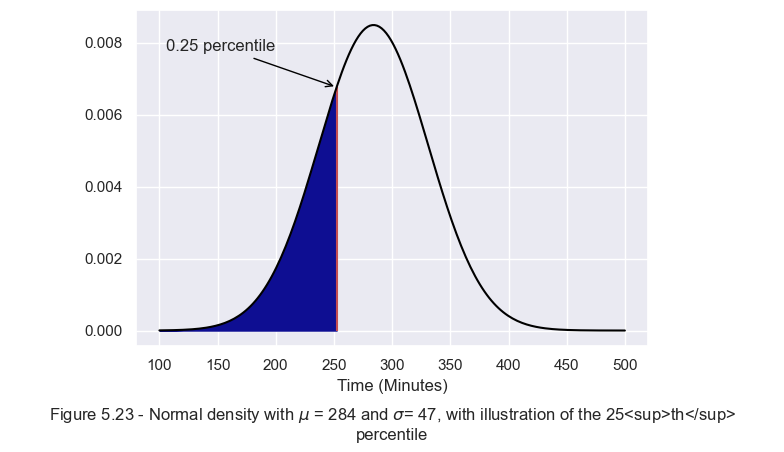

In [47]:
fig = plt.figure();
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
txt = r'Figure 5.23 - Normal density with $\mu$ = 284 and $\sigma$= 47, with illustration of the 25<sup>th</sup> percentile';

percent_25 = arrival_times.ppf(0.25)

x_n = np.linspace(100,500,200)
section = np.linspace(100, percent_25, 200)

ax = sns.lineplot(x=x_n,
            y = arrival_times.pdf(x_n),
                 color = 'black')

ax.fill_between(section,arrival_times.pdf(section), color = '#0e0e92')
plt.vlines(percent_25, 0, arrival_times.pdf(percent_25), 'r')

plt.annotate('0.25 percentile', 
             xy=(percent_25, arrival_times.pdf(percent_25)), 
             xytext=(percent_25-100, arrival_times.pdf(percent_25)+0.001),
             # arrowprops=dict(width=1, headwidth=5, facecolor='black', shrink=0.05),
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = 'black'),
             horizontalalignment='center')


ax.set(xlabel='Time (Minutes)');
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12);

Equivalently, we wish to find the value $x_{25}$ such that 

$$P(X \leq x_{25} ) = F(x_{25}) = 0.25$$

##### Calculating Normal Percentiles

Percentiles of a normal curve are conveniently computed in Python by use of the `norm.ppf` function. Specifically, `ppf(p, loc, scale)` gives the percentile of a Normal(m,s) curve corresponding to a "left area" of p. In our example, the value of $p$ is 0.25, and so the 25<sup>th</sup> percentile of the running times (with mean 284 minutes and standard deviation 47 minutes) is computed to be

In [48]:
arrival_times.ppf(0.25)

252.29898174078417

This means one needs to run faster (fewer than 252 minutes) to get a t-shirt in this competition.

Suppose one needs to complete the race faster than 10% of the runners to be invited to run in the race the following year. How fast does one need to run? If one wishes to have a 10% of the times to be larger than one’s time, this means that 90% of the times will be smaller than one’s time. That is, one wishes to find the 90<sup>th</sup> percentile, $x_{90}$ of the normal distribution, shown in Figure 5.24.

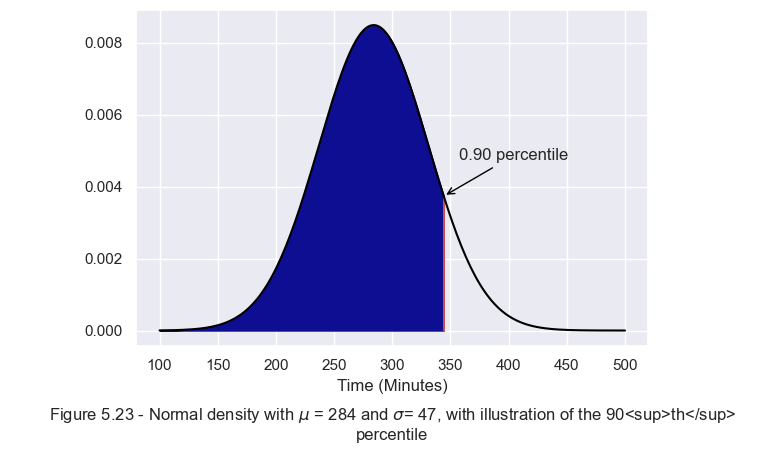

In [49]:
import matplotlib.pyplot as plt

fig = plt.figure();
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
txt = r'Figure 5.23 - Normal density with $\mu$ = 284 and $\sigma$= 47, with illustration of the 90<sup>th</sup> percentile';

percent_90 = arrival_times.ppf(0.90)

x_n = np.linspace(100,500,200)
section = np.linspace(100, percent_90, 200)

ax = sns.lineplot(x=x_n,
            y = arrival_times.pdf(x_n),
                 color = 'black')

ax.fill_between(section,arrival_times.pdf(section), color = '#0e0e92')
plt.vlines(percent_90, 0, arrival_times.pdf(percent_90), 'r')

plt.annotate('0.90 percentile', 
             xy=(percent_90, arrival_times.pdf(percent_90)), 
             xytext=(percent_90+60, arrival_times.pdf(percent_90)+0.001),
             # arrowprops=dict(width=1, headwidth=5, facecolor='black', shrink=0.05),
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = 'black'),
             horizontalalignment='center')

ax.set(xlabel='Time (Minutes)');
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12);

In [50]:
arrival_times.ppf(0.90)

344.2329235805962

So 344 minutes is the time to beat if one wishes to be invited to participate in next year’s race.

## Binomial Distribution and the Normal Curve

The normal curve is useful for modeling batches of data, especially when one is collecting measurements of some process. But the normal curve actually has a more important justification. We will explore several important results about the pattern of binomial probabilities and sample means and we will find these results useful in our introduction to statistical inference.

First, consider different shapes of binomial distributions. Suppose that half of one’s student body is female and one plans on taking a sample survey of $n$ students to learn if they are interested in using a new recreational sports complex that is proposed. Let $X$ denote the number of females in the sample. Assuming a random sample is chosen, it is known that X will be distributed binomial with parameters $n$ and $p = 1/2$. What is the shape of the binomial probabilities? Figure 5.25 displays the binomial probabilities for sample sizes $n$ = 10, 20, 50, and 100

In [51]:
from scipy.stats import binom

values = np.concatenate((binom.pmf(k = np.arange(0,10 + 1), p = 1/2, n = 10),
               binom.pmf(k = np.arange(0,20 + 1), p = 1/2, n = 20),
                binom.pmf(k = np.arange(0,50 + 1), p = 1/2, n = 50),
                binom.pmf(k = np.arange(0,100 + 1), p = 1/2, n = 100)
              ))



In [52]:
bin_size = np.concatenate((np.repeat('10', 11),
                          np.repeat('20', 21),
                          np.repeat('50', 51),
                          np.repeat('100', 101)))

In [53]:
df_plot = pd.DataFrame({'Values':values,
                       'Binomial size':bin_size})

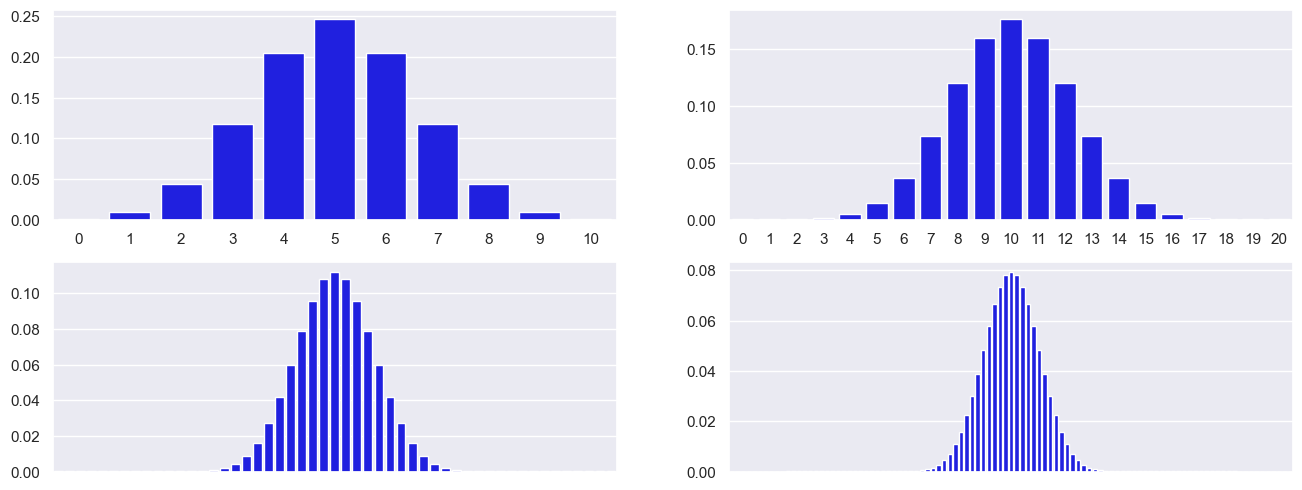

In [54]:
# Create figure
fig = plt.figure(figsize=(16, 6))

# Create subplot axes
ax1 = fig.add_subplot(2, 2, 1)  # 1x3 grid, position 1
ax2 = fig.add_subplot(2, 2, 2)  # 1x3 grid, position 1
ax3 = fig.add_subplot(2, 2, 3)  # 1x3 grid, position 1
ax4 = fig.add_subplot(2, 2, 4)  # 1x3 grid, position 1

sample_size = 10
sns.barplot(x = np.arange(0,sample_size + 1),
            y = binom.pmf(k = np.arange(0,sample_size + 1), p = 1/2, n = sample_size),
            color='blue',
            ax = ax1);

sample_size = 20
sns.barplot(x = np.arange(0,sample_size + 1),
            y = binom.pmf(k = np.arange(0,sample_size + 1), p = 1/2, n = sample_size),
            color='blue',
            ax = ax2);

sample_size = 50
g1 = sns.barplot(x = np.arange(0,sample_size + 1),
            y = binom.pmf(k = np.arange(0,sample_size + 1), p = 1/2, n = sample_size),
            color='blue',
            ax = ax3);

g1.set(xticklabels=[]);

sample_size = 100
g2 = sns.barplot(x = np.arange(0,sample_size + 1),
            y = binom.pmf(k = np.arange(0,sample_size + 1), p = 1/2, n = sample_size),
            color='blue',
            ax = ax4);

g2.set(xticklabels=[]);

What does one notice about these probability graphs? First, note that each distribution is symmetric about the mean $\mu = np$. But, more interesting, the shape of the distribution seems to resemble a normal curve as the number of trials $n$ increases.

Perhaps this pattern happens since one started with a binomial distribution with $p = 0.5$ and one would not see this behavior if a different value of $p$ was used. Suppose that only 10% of all students would use the new facility and let $X$ denote the number of students in your sample who say they would use the facility. The random variable $X$ would be distributed binomial with parameters $n$ and $p = 0.1$. Figure 5.26 shows the probability distributions again for the sample sizes $n = 10, 20, 50, and 100$. As one might expect the shapes of the probabilities for $n=10$ are not very normal-shaped – the distribution is skewed right. But, note that as $n$ increases, the probabilities become more normal-shaped and the normal curve seems to be a good match for $n = 100$.

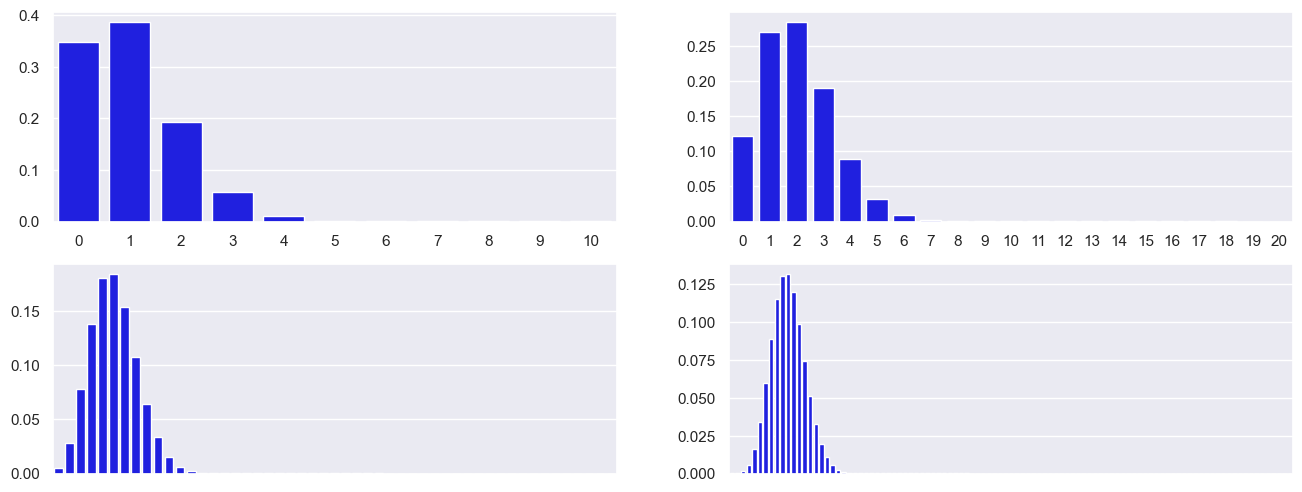

In [55]:
# Create figure
fig = plt.figure(figsize=(16, 6))

# Create subplot axes
ax1 = fig.add_subplot(2, 2, 1)  # 1x3 grid, position 1
ax2 = fig.add_subplot(2, 2, 2)  # 1x3 grid, position 1
ax3 = fig.add_subplot(2, 2, 3)  # 1x3 grid, position 1
ax4 = fig.add_subplot(2, 2, 4)  # 1x3 grid, position 1

sample_size = 10
sns.barplot(x = np.arange(0,sample_size + 1),
            y = binom.pmf(k = np.arange(0,sample_size + 1), p = 0.1, n = sample_size),
            color='blue',
            ax = ax1);

sample_size = 20
sns.barplot(x = np.arange(0,sample_size + 1),
            y = binom.pmf(k = np.arange(0,sample_size + 1), p = 0.1, n = sample_size),
            color='blue',
            ax = ax2);

sample_size = 50
g1 = sns.barplot(x = np.arange(0,sample_size + 1),
            y = binom.pmf(k = np.arange(0,sample_size + 1), p = 0.1, n = sample_size),
            color='blue',
            ax = ax3);

g1.set(xticklabels=[]);

sample_size = 100
g2 = sns.barplot(x = np.arange(0,sample_size + 1),
            y = binom.pmf(k = np.arange(0,sample_size + 1), p = 0.1, n = sample_size),
            color='blue',
            ax = ax4);

g2.set(xticklabels=[]);

Figures 5.25 and 5.26 illustrate a basic result: if one has a binomial random variable $X$ with $n$ trials and probability of success $p$, then, as the number of trials $n$ approaches infinity, the distribution of the standardized score

$$Z = \frac{X-np}{\sqrt{np(1-p)}}$$

approaches a standard normal random variable, that is a normal distribution with mean 0 and standard deviation 1. This is a very useful result. It means, that for a large number of trials, one can approximate a binomial random variable $X$ by a normal random variable with mean and standard deviation

$$\mu = np, \sigma = \sqrt{np(1-p)}$$

This approximation result can be illustrated with our student survey example. Suppose that 10% of the student body would use the new recreational sports complex. One takes a random sample of 100 students — what’s the probability that 5 or fewer students in the sample would use the new facility?

The random variable $X$ in this problem is the number of students in the sample that would use the facility. This random variable has a binomial distribution with $n = 100$ and $p = 0.1$ that is pictured as a histogram in Figure 5.27. By the approximation result, this distribution is approximated by a normal curve with $\mu = 100(0.1) = 10$ and $\sigma = \sqrt{100(0.1)(0.9)} = 3$. This normal curve is placed on top of the probability histogram in Figure 5.27 – note that
it is a pretty good fit to the histogram.

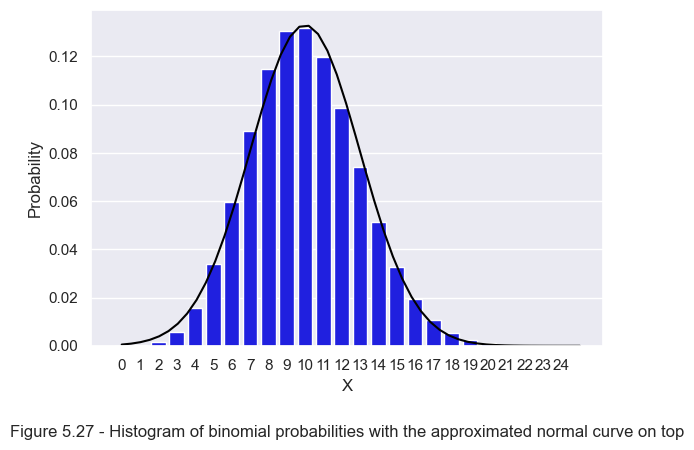

In [56]:
fig = plt.figure();
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
txt = r'Figure 5.27 - Histogram of binomial probabilities with the approximated normal curve on top';

n = 100
p = 0.1

mu = n*p
sigma = np.sqrt(100*p*(1-p))

norm_bin = norm(loc= mu, scale = sigma)

sns.barplot(x = np.arange(0,25),
            y = binom.pmf(np.arange(0,25), p = 0.1, n = 100),
           color='blue')

sns.lineplot(x = np.linspace(0,25,50),
            y = norm_bin.pdf(np.linspace(0,25,50)),
            color = 'black');

ax.set(xlabel='X');
ax.set(ylabel='Probability');

plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12);

##### Binomial Computations Using a Normal Curve

One is interested in the probability that at most 5 students use the facility, that is, $P(X \leq 5)$. This probability is approximated by the area under a Normal(10, 3) curve between $X = 0$ and $X = 5$. Using the Python `pdf()` function, we compute this normal curve area to be

In [57]:
norm.cdf(5, loc = 10, scale = 3) - norm.cdf(0, loc = 10, scale = 3)  

0.04736129193961786

In this case, one can also find this probability exactly by a calculator or computer program that computes binomial probabilities. Using the `scipy.stats.binom.pmf()` function, we find the probability that X is at most 5 is

In [58]:
binom.cdf(k = 5, n = 100, p = 0.1)

0.0575768864870338

In [59]:
sum(binom.pmf(np.arange(0,6), n = 100, p = 0.1))

0.05757688648703448

As we can see Normal approximation gives a similar answer to the exact binomial computation.

## Sampling Distribution of the Mean

We have seen that binomial probabilities are well-approximated by a normal curve when the number of trials is large. There is a more general result about the shape of sample means that are taken from any population.

To begin our discussion about the sampling behavior of means, suppose one has a jar filled with a variety of candies of different weights. One is interested in learning about the mean weight of a candy in the jar. One could obtain the mean weight by measuring the weight for every single candy in the jar, and then finding the mean of these measurements. But that could be a lot of work. Instead of weighing all of the candies, suppose one selects a random sample of 10 candies from the jar and finds the mean of the weights of these 10 candies. What has one learned about the mean weight of all candies from this sample information?

To answer this type of question, one assumes he or she knows the weights of all candies in the jar and examines the pattern of means obtained after taking random samples from the jar.

The group of items (here, candies) of interest is called the population. Assume first that one knows the population – that is, we know exactly the weights of all candies in the jar. There are five types of candies – Table 5.1 gives the weight of each type of candy (in grams) and the proportion of candies of that type.

|   | Weight | Proportion |
|---|--------|------------|
|fruity square|2|0.15|
|milk maid|5|0.35|
|jelly nougat|8|0.20|
|caramel|14|0.15|
|candy bars|18|0.15|

Let $X$ denote the weight of a randomly selected candy from the jar. Note that $X$ is a discrete random variable with the probability distribution given in Table 5.1. This distribution is summarized by computing a mean $\mu$ and a standard deviation $\sigma$. The reader can verify in the end-of-chapter exercises that $\mu$ = 8.4500 and $\sigma$ = 5.3617. So if one was really able to weigh each candy in the jar, one would find the mean weight to be 8.45 gm

In [60]:
df_candies = pd.DataFrame({'Fruit':['fruity square','milk maid','jelly nougat','caramel','candy bars'],
             'Weight':np.array([2,5,8,14,18]),
             'Proportion':np.array([0.15,0.35,0.20,0.15,0.15])})

df_candies['Total Weight'] = df_candies['Weight']*df_candies['Proportion']*100

In [61]:
df_candies.head()

,Fruit,Weight,Proportion,Total Weight
0,fruity square,2,0.15,30.0
1,milk maid,5,0.35,175.0
2,jelly nougat,8,0.20,160.0
3,caramel,14,0.15,210.0
4,candy bars,18,0.15,270.0


In [62]:
df_candies['Total Weight'].sum()/100

8.45

In [63]:
1.75+0.8+1.6+1.8+1.25+1.+1.25+3.25+4.+3.25+2.5+1.5+1.3+3.95+1.+1.+1.85+1.25+1.25+0.85+1.+2.+1.+1.65+1.+1.+6

50.05

Suppose a random sample of 10 candies is selected with replacement from the jar and the mean is computed. Note that this is called the sample mean $\bar{X}$ to distinguish it from the population mean $\mu$.

##### Sampling Candies

This sampling can be simulated using the following Python code. The distribution of candies is stored in the `df_candies` dataframe columns `Weights` and `Proportion`. By use of the `np.random.choice()` function, one obtains the following candy weights:

In [64]:
np.random.seed(1234)
np.random.choice(df_candies['Weight'], replace = True, size = 10, p = df_candies['Proportion'])

array([ 5,  8,  5, 14, 14,  5,  5, 14, 18, 18])

One computes the sample mean
$$\bar{X} = (5 + 8 + 5 + 14 + 14 + 5 + 5 + 14 + 18 + 18)/10 = 10.6 $$

Suppose this process is repeated two more times

In [65]:
np.random.seed(2341)
np.random.choice(df_candies['Weight'], replace = True, size = 10, p = df_candies['Proportion']).mean()

6.6

In [66]:
np.random.seed(3412)
np.random.choice(df_candies['Weight'], replace = True, size = 10, p = df_candies['Proportion']).mean()

10.0

Thus obtaining $\bar{X} = 6.6$ and $\bar{X} = 10.0$. The three sample mean values are plotted in Figure 5.28

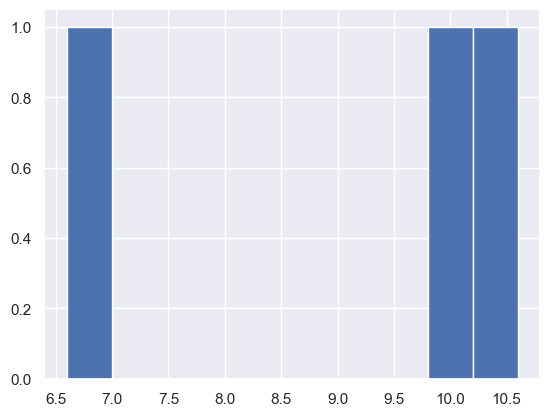

In [67]:
mean = np.array([10.6,6.6,10.0]);

plt.hist(x = mean);

Suppose that one continues to take random samples of 10 candies from the jar and plot the values of the sample means on a graph – one obtains the sampling distribution of the mean $\bar{X}$, shown in Figure 5.29. Note that there is an interesting pattern of these sample means – they appear to have a normal shape. This motivates an amazing result, called the **Central Limit Theorem**, about the pattern of sample means. If one takes sample means from any population with mean $\mu$ and standard deviation $\sigma$, then the sampling distribution of the means (for large enough sample size) will be approximately normally distributed with mean and standard deviation

$$E(\bar{X}) = \mu, SD(\bar{X}) = \frac{\sigma}{\sqrt{n}}$$

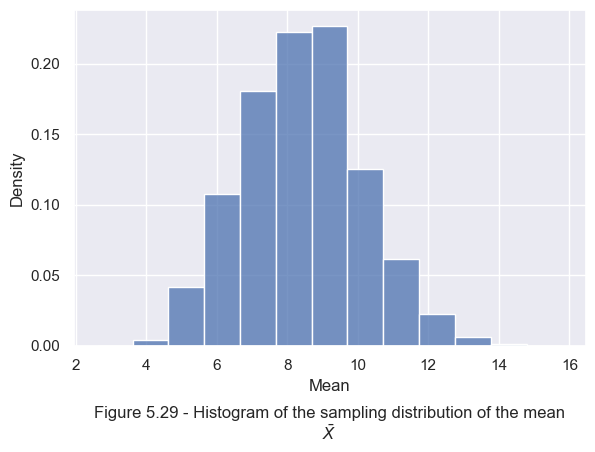

In [68]:
rep = 50000

mean = np.array([np.random.choice(df_candies['Weight'], 
                                  replace = True, 
                                  size = 10, 
                                  p = df_candies['Proportion']).mean() for _ in np.arange(rep)])         

fig = plt.figure();
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
txt = r'Figure 5.29 - Histogram of the sampling distribution of the mean $\bar{X}$';


sns.histplot(mean,
             stat = 'probability',
            bins=13);

ax.set(xlabel='Mean');
ax.set(ylabel='Density');

plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12);

Let’s illustrate this result for our candy example. Recall that the population of candy weights had a mean and standard deviation given by $\mu = 8.45$ and $\sigma = 5.36$, respectively. If one takes samples of size $n = 10$, then, by this result, the sample mean $\bar{X}$ will be approximately normally distributed where

$$E(\bar{X}) = 8.45, SD(\bar{X}) = \frac{5.36}{\sqrt{10}}=1.69$$

This normal curve is drawn on top of the histogram of sample means, shown in Figure 5.30

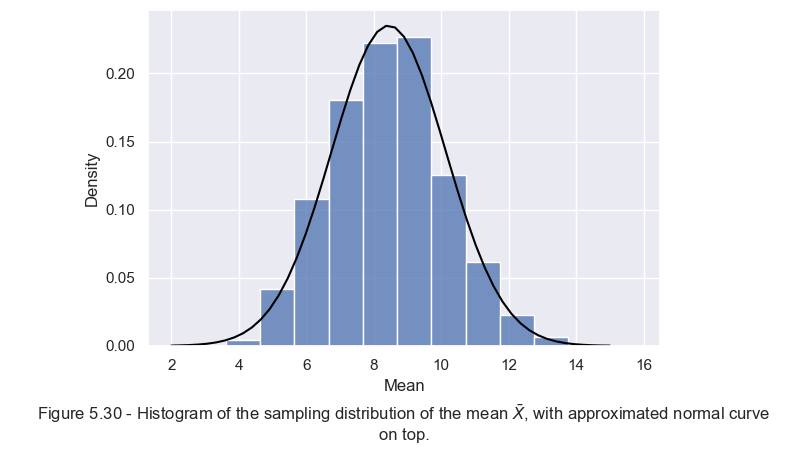

In [69]:
fig = plt.figure();
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
txt = r'Figure 5.30 - Histogram of the sampling distribution of the mean $\bar{X}$, with approximated normal curve on top.';


sns.histplot(mean,
             stat = 'probability',
            bins=13);

sns.lineplot(x = np.linspace(2,15,50),
            y = norm.pdf(np.linspace(2,15,50), loc = mean.mean(), scale = mean.std()),
            color = 'black');

ax.set(xlabel='Mean');
ax.set(ylabel='Density');

plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12);

There are two important points to mention about this result.

1. First the expected value of the sample means, $E(\bar{X})$, is equal to the population mean $\mu$. When one takes a random sample, it is possible that the sample mean $\bar{X}$ is far away from the population mean $\mu$. But, if one takes many random samples, then, on the average, the sample mean will be close to the population mean.

2. Second, note that the spread of the sample means, as measured by the standard deviation, is equal to $\sigma/\sqrt{n}$. Since the spread of the population is $\sigma$, note that the spread of the sample means will be smaller than the spread of the population. Moreover, if one takes random samples of a larger size, then the spread of the sample means will decrease.

The second point can be illustrated in the context of our candy example. Above, we selected random samples of size $n = 10$ and computed the sample means. Suppose instead one selected repeated samples of $size n = 25$ from the candy jar – how does the sampling distribution of means change? Using Python, one can simulate the process of taking samples of size 25 – histograms of the sample means are shown in Figure 5.31. By the Central Limit Theorem, the sample means will be approximately normal-shaped with mean and standard deviation

$$E(\bar{X}) = 8.45, SD(\bar{X}) = \frac{5.36}{\sqrt{25}}=1.07$$

Comparing the n = 10 sample means with the n = 25 sample means in Figure 5.31, what’s the difference? Both sets of sample means are normally distributed with an average equal to the population mean. But the n = 25 sample means have a smaller spread – this means that as you take bigger samples, the sample mean $\bar{X}$ is more likely to be close to the population mean $\mu$. The simulation is left as an end-of-chapter exercise.

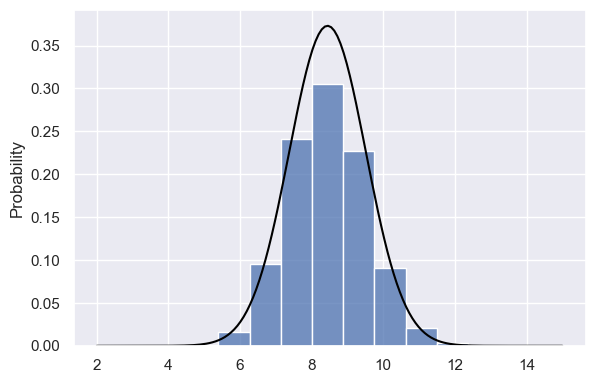

In [70]:
rep = 50000
mean = np.array([np.random.choice(df_candies['Weight'], 
                                  replace = True, 
                                  size = 25, 
                                  p = df_candies['Proportion']).mean() for _ in np.arange(rep)])         

fig = plt.figure();
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
txt = r'Figure 5.30 - Histogram of the sampling distribution of the mean $\bar{X}$, with sample sizes $n = 25$ and n = 25 with approximated normal curve on top.';

sns.histplot(mean,
             stat = 'probability',
            bins=10);

sns.lineplot(x = np.linspace(2,15,150),
            y = norm.pdf(np.linspace(2,15,150), loc = mean.mean(), scale = mean.std()),
            color = 'black');


## The Central Limit Theorem works for any population

We illustrate the Central Limit Theorem for a second example where the population has a distinctive non-normal shape. At one university, many of the students’ hometowns are within 40 miles of the school. There also are a large number of students whose homes are between 80-120 miles of the university. Given the population of “distances of home” of all students, it is interesting to see what happens when we take random samples from this population.

If we let $X$ denote "distance from home", imagine that the population of distances is described by the continuous density curve in Figure 5.32. Two humps can be seen in this density – these correspond to the large number of students whose homes are in the ranges 0 to 40 miles and 70 to 130 miles. Suppose the mean and standard deviation of this population are given by
$\mu = 60$ miles and $\sigma = 41.6$ miles, respectively[<sup>1</sup>](#custom_dist).

In [71]:
norm_1 = norm(loc = 25, scale = 6)

In [72]:
norm_2 = norm(loc = 100, scale = 14)

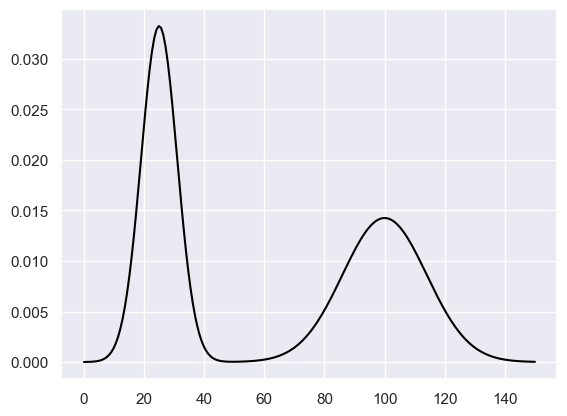

In [73]:
interval = np.linspace(0,150,200)

sns.lineplot(x = interval,
            y = (norm_1.pdf(interval) + norm_2.pdf(interval))/2,
            color = 'black');

# sns.lineplot(x = interval, 
#              y = norm_1.pdf(interval),
#              color = 'black');

# sns.lineplot(x = interval,
#              y = norm_2.pdf(interval),
#              color = 'black');

Now imagine that one takes a random sample of n students from this population and computes the sample mean from this sample. For example, suppose one takes a random sample of 20 students and collect the distances from home from these students – once one has collected the 20 distances, one computes the sample mean $\bar{X}$. Here are two samples and the values of $\bar{X}$:

In [81]:
from scipy import stats

class comb_distribution(stats.rv_continuous):
    norm_1 = norm(loc = 25, scale = 6)
    norm_2 = norm(loc = 100, scale = 14)
    
    def _pdf(self, x):
        return ((norm_1.pdf(x) + norm_2.pdf(x))/2)
    

def draw_sample(n_samples, custom_distr):
    return(np.array([np.int(custom_distr.rvs()) for _ in np.arange(n_samples)]))

In [79]:
student_distance_distribution = comb_distribution(a = 0, b = 150)

In [85]:
np.random.seed(2345)

s1 = draw_sample(20, student_distance_distribution)
print('Sample 1:')
print(s1)
print('xbar: ' + str(s1.mean()))

s2 = draw_sample(20, student_distance_distribution)
print('Sample 2:')
print(s2)
print('xbar: ' + str(s2.mean()))


Sample 1:
[ 93  30  94  24 104  91  22  25 113  33  20 109  24 104  32  19 111  91
 115 107]
xbar: 68.05
Sample 2:
[106  82  23 109 109  99  14 103  27  35 102  20  23 127  97  16 131  84
  80  23]
xbar: 70.5


> If this sampling process is repeated many times, what will the distribution of sample means look like? Also, what is the effect of the sample size $n$?

To answer this question one can let the computer simulate repeated samples of sizes $n = 1$,$n = 2$,$n = 5$, and $n = 20$. The histograms in Figure 5.33 show the distributions of ***sample means*** for the four sample sizes.

<Figure size 640x480 with 0 Axes>

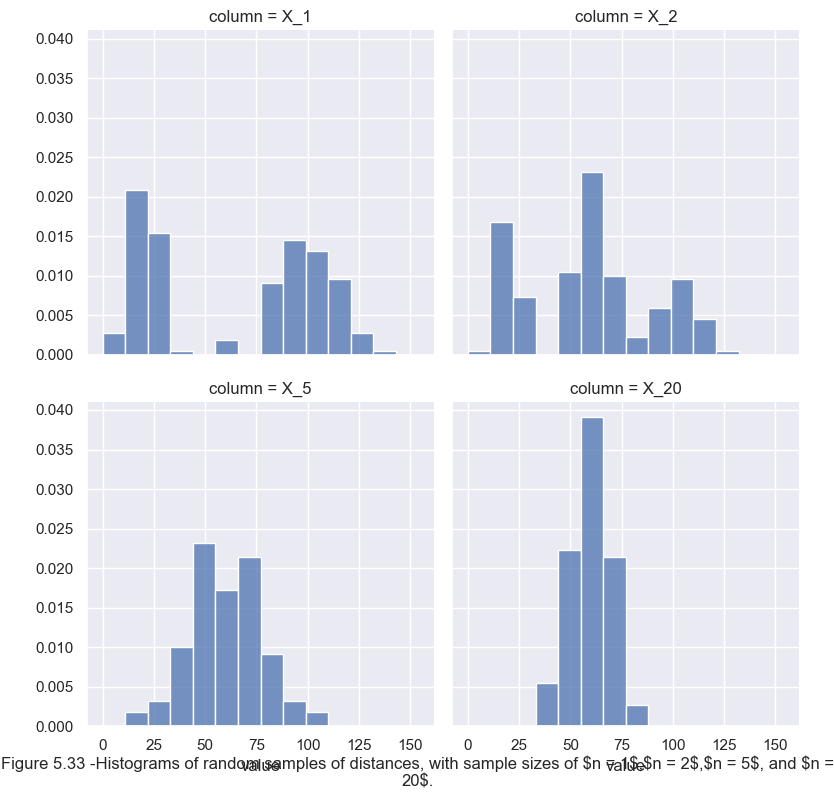

In [89]:
import seaborn as sns
import pandas as pd

df_means = pd.read_pickle('./data/df_means.pkl')

cols = ['X_1','X_2','X_5','X_20']

df_melted = df_means[cols].melt(var_name='column')

fig = plt.figure();
# ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
txt = r'Figure 5.33 -Histograms of random samples of distances, with sample sizes of $n = 1$,$n = 2$,$n = 5$, and $n = 20$.';

g = sns.FacetGrid(df_melted, 
                  col='column', 
                  col_wrap=2, 
                  height=4);
g.map(sns.histplot, 
      'value', 
      binwidth = 11, 
      binrange = [0,150],
      stat = 'density', ax = ax);

plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12);

As one might expect, if samples of size 1 are selected, our sample means look just like the original population. If samples of size 2 are selected, then the sample means have a funny three-hump distribution. But, note as one takes samples of larger sizes, the sampling distribution of means looks more like a normal curve. This is what one expects from the Central Limit Theorem
result – no matter what the population shape, the distribution of the sample means will be approximately normal if the sample size is large enough.

What is the distribution of the sample means when we take samples of size $n = 20$? One just applies the Central Limit Theorem result. The sample means will be approximately normal with mean and standard deviation.

$$ E(\bar{X}) = \mu, SD(\bar{X}) = \frac{\sigma}{\sqrt{n}}$$

Since we know he mean and standard deviation of the population and the sample size, one just substitute these quantities and obtains.

$$ E(\bar{X}) = 60, SD(\bar{X}) = \frac{41.6}{\sqrt{20}} = 9.3$$

These results can be used to answer some questions.

1. **What is the probability that a student’s distance from home is between 40 and 60 miles?**
<br>Actually this is a difficult question to answer exactly, since one does not know the exact shape of the population. But, looking at the graph of the population, one sees that the curve takes on very small values between 40 and 60 miles. So this probability is close to zero – very few students live between 40 and 60 miles from our school. If we use the pdf we built in Python we obtain:

In [93]:
student_distance_distribution.cdf(60) - student_distance_distribution.cdf(40) 

0.004168960970372115

2. **What is the probability that, if one takes a sample of 20 students, the mean distance from home for these 20 students is between 40 and 60 miles?**
<br>This is a different question than the first one. This question is asking about the chance that the sample mean falls between 40 and 60 miles. Since the sampling distribution of $\bar{X}$ is approximately normal with mean 60 and standard deviation 9.3, one can compute this by using Python. Using the `norm.cdf()` function, one obtains

In [96]:
norm.cdf(60, loc = 60, scale = 9.3) - norm.cdf(40, loc = 60, scale = 9.3) 

0.4842436437864727

If we analyse the density function we built using that model in figure ..., we can build a normal distribution with mean and standard deviation computed using 20 samples

In [107]:
means_mu = df_means['X_20'].mean()
means_std = df_means['X_20'].std()

means_distr = norm(loc = means_mu, scale = means_std)

means_distr.cdf(60) - means_distr.cdf(40) 

0.5023301187655238

It is interesting to note that although it is unlikely for students to live between 40 and 60 miles from the school, it is pretty likely for the sample mean for a group of 20 students to fall between 40 and 60 miles.

3. **What is the probability that the mean distance exceeds 100 miles?**
<br> Here one wants to find the probability that $\bar{X}$ is greater than 100, that is $P(\bar{X} > 100)$. Using Python, one computes

In [109]:
1 - means_distr.cdf(100)

9.375775434028455e-06

In [111]:
1 - norm.cdf(100, loc = 60, scale = 9.3)

8.4985654282832e-06

This probability is essentially zero, which means that it is highly unlikely that a sample mean of 20 student distances will exceed 100 miles.

<span id="custom_dist"> For futher details refers to the [Python section notebook]('http://localhost:8888/notebooks/Python/ProbabilityAndStatistics/Probability%20and%20Bayesian%20Modeling/05_continuous_distribution_python.ipynb')</span>